 # Experiments - The axis of the French National Assembly

 In this notebook we investigate the ideological axis of the parties inside of the French National Assembly. As a reminder, the different groups of the assembly are the following (taken from their seatwise left-right order inside of the assembly):

* GDR : "Gauche Démocrate et Républicaine", Communist
* LFI : "La France Insoumise", Left
* Ecolo : Ecologists
* PS : "Parti socialiste", Socialist

These first 4 groups form the left coalition, called "NUPES" (Nouvelle Union Populaire Ecologique et Sociale).

* Dem : "Démocrates", center
* RE : "Renaissance", center-right, government party
* HOR : "Horizon", right

These 3 groups from the government coalition.

* LR : "Les Républicains", right
* RN : "Rassemblement National", Far-right

Finally, there is another group, with deputies seated around everywhere, as they claim to be the groups for independent deputies, and regionalist:

* LIOT : "Libérté, Indépendant, Outre-mer et Térritoires"

We want to investigate how would be ordered these parties on an ideological 1D axis. We also investigate if a circle (a cycle) would represent better the parliament than an axis. 

I decided to focus on political groups instead of individual deputies, for several reason : (1) most deputies miss most votes. (2) the complexity being exponential in the number of candidates on the axis, this would not be reasonable to consider the 577 deputies.

For this, we use our *axis* library

In [14]:
import axisrules as axis

We will also need the following classical libraries

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In this notebook, we will use the data from the votes of the deputies taken from [data.assemblee-nationale.fr](https://data.assemblee-nationale.fr/travaux-parlementaires/votes). This dataset contains the votes of all deputies during the 16th legislature (June 2022 - July 2023). There are 3 kinds of vote : 

* Solannel votes (SPS), which are very important votes on major laws.
* Trust vote to the governement, which we ignore here because these are very specifics vote
* Ordinary votes (SPO), which happens far more often than SPS. They can be used for minor laws, for part of laws, or more often for amendments on laws.

I have preprocessed those files to obtain approval votes. For each group and each vote I computed the most important position. If there are more "in favor" than "against", it is counted as approved (+1), of there are less, as disapproved (-1), and if the values are the same, as abstaining (0). Note that the main position of deputies inside a group could be abstention but the group could still count as approved if more people voted in favor than against.

In [16]:
# load files with pandas 
df_spo = pd.read_csv('data/approval_assembly_spo.csv')
parties = list(df_spo.columns)
votes_spo = df_spo.to_numpy()
votes_sps = pd.read_csv('data/approval_assembly_sps.csv').to_numpy()
votes_spo = np.concatenate([votes_spo, votes_sps])

For now, we will assume that if a group abstain from the vote, they disapprove the vote.

As we see below, there a 23 solannels votes and 2500 votes in total (solannels + ordinary).

In [4]:
votes_spo = np.maximum(votes_spo, 0)
votes_sps = np.maximum(votes_sps, 0)
print(len(votes_sps))
print(len(votes_spo))

23
2500


If we look at the distribution of the number of group voting in favor, we obtain the following distribution, centered around 4-5, which changes from approval ballots of voters in most election, which are often centered around 2-3. Note that here the "voters" are the votes (the law and amendements), and the "candidates" are the political groups.

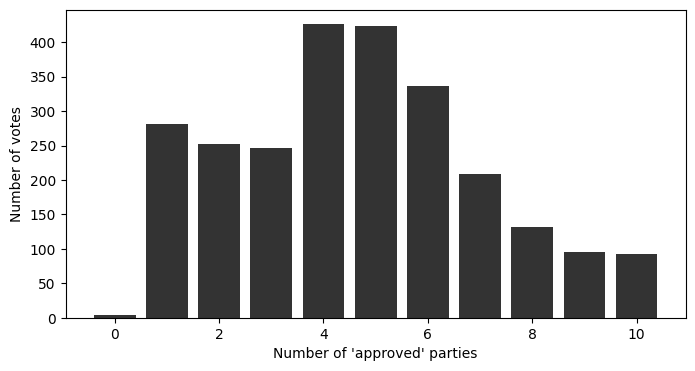

In [5]:
nb_approved = [len([ballot for ballot in votes_spo if sum(ballot) == j]) for j in range(0,11)]
plt.figure(figsize=(8,4))
plt.bar(range(0,11), nb_approved, color="k", alpha=0.8)
plt.xlabel("Number of 'approved' parties")
plt.ylabel("Number of votes")
plt.show()

Let's directly start, and look at which axis we obtain with these data. Let's start with the "SPS" data. Unfortunately, this dataset being very small (23 voters), a lot of axis obtain the same score (e.g. for voter deletion, the minimal cost is 1, obtained by 12 different axis). However, it seems that the axis presented in the beginning (based on the actual seat position) is one of these resulting axis.

In [6]:
axis_rules = [axis.VoterDeletion, axis.MinimalFlips, axis.BallotCompletion, axis.MinimalSwaps, axis.ForbiddenTriples]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(votes_sps)
    res = rule_instance.bruteforce()
    print("Number of optimal axis :", len(res))
    print("Example :", axis.get_axis(res[0][0], parties))
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score)
    print("\n")

Voter Deletion
Number of optimal axis : 12
Example : LFI < GDR < Écolo < SOC < LIOT < RE < Dem < HOR < LR < RN
Score of this axis : 1.0


Minimal Flips
Number of optimal axis : 12
Example : LFI < GDR < Écolo < SOC < LIOT < RE < Dem < HOR < LR < RN
Score of this axis : 1.0


Ballot Completion
Number of optimal axis : 12
Example : LFI < GDR < Écolo < SOC < LIOT < RE < Dem < HOR < LR < RN
Score of this axis : 1.0


Minimal Swaps
Number of optimal axis : 12
Example : LFI < GDR < Écolo < SOC < LIOT < RE < Dem < HOR < LR < RN
Score of this axis : 1.0


Forbidden Triples
Number of optimal axis : 12
Example : LFI < GDR < Écolo < SOC < LIOT < RE < Dem < HOR < LR < RN
Score of this axis : 6.0




Let's now look at the SPO dataset, which contains 2500 votes. We obtain the following axis. This time, there is only one optimal axis for each rule. We note several things:

* The different rules lead to very similar axis. The only thing that vary are the order of candidates inside of coalition and the position of the group of independents LIOT.

* The resulting axis is not the classical left-right axis, but more a government-opposition axis. On one extreme we find the groups of the government coalition, on the other extreme the groups of the left coalition. In between, we see groups from the right and far-right (LR and RN), who vote sometimes with the governement coalition, and sometimes with the left coalition. It is very rare that the left coalition vote together with the governement coalition. This is also due to the fact the left coalition is at the origin of a lot of amendment, and thus of votes. On these amendement, they vote in favor and everyone else vote against.

In [8]:
axis_rules = [axis.VoterDeletion, axis.MinimalFlips, axis.BallotCompletion, axis.MinimalSwaps, axis.ForbiddenTriples]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(votes_spo)
    res = rule_instance.bruteforce()
    axis.print_axis(res[0][0], parties)
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score)
    print("\n")

Voter Deletion
RE < Dem < HOR < LR < RN < SOC < Écolo < LFI < GDR < LIOT
Score of this axis : 910.0


Minimal Flips
RE < HOR < Dem < LR < RN < SOC < Écolo < LFI < GDR < LIOT
Score of this axis : 1424.0


Ballot Completion
GDR < Écolo < LFI < SOC < LIOT < RN < LR < Dem < HOR < RE
Score of this axis : 1759.0


Minimal Swaps
GDR < LFI < Écolo < SOC < LIOT < RN < LR < Dem < HOR < RE
Score of this axis : 2770.0


Forbidden Triples
GDR < LFI < Écolo < SOC < LIOT < RN < LR < Dem < HOR < RE
Score of this axis : 10809.0




If we look in more details, we have the following:

* The optimal axis for VD fits 63.6% of the votes
* For MF, we need to flip 0.56 parties per vote to obtain a linear profile
* For BC, we need 0.7 additional parties per vote to obtain a linear profile
* for MS, we need to swap 1.1 adjacent parties to obtain a linear profile
* The optimal axis for FT contains 4.3 forbidden triples per votes.

We often hear the nowadays parties form more a circle than an axis, the far-left and far-right joining. To get a real idea of the veradicity of this, a better way would be to look at the co-approval matrix. But for now, let's try our circular version of VD and BC, and see if they enable to find a better axis (cycle).

Of course, the cost will be lower because the optimal axis for VD already has a lower or equal cost for VD-circular.


In [9]:
axis_rules = [axis.VoterDeletionCircular, axis.BallotCompletionCircular]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(votes_spo)
    res = rule_instance.bruteforce()
    print("Number of optimal axis :", len(res))
    print("Example :")
    axis.print_axis(res[0][0], parties)
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score)
    print("\n")

Voter Deletion Circular
Number of optimal axis : 2
Example :
GDR < LFI < Écolo < SOC < RN < LR < HOR < RE < Dem < LIOT
Score of this axis : 667.0


Ballot Completion Circular
Number of optimal axis : 2
Example :
GDR < LIOT < RN < LR < HOR < RE < Dem < SOC < Écolo < LFI
Score of this axis : 1004.0




We observe that the optimal axis for VD fits 73.3% (9.7% more than before) and the BC needs 0.4 additional candidates (0.3 less than before, which is 40% less.)

This time, we see 4 poles :

* Government coalition (Dem closer to left, HOR closer to right)
* Left coalition (Socialists closer to government, GDR closer to independents)
* Independents
* The rights-wing parties (LR being closer to the governement, RN being closer to the opposition)

It would be interesting to look at the most frequent alliances in votes:

In [10]:
matrix = axis.compute_weighted_matrix(votes_spo, 10)
print("The 20 most frequent alliances")
for i in range(20):
    n = matrix[i][-1]
    list_approving = ", ".join([parties[j] for j in range(10) if matrix[i][j] != 0])
    print(f"{n} votes for {list_approving}")

The 20 most frequent alliances
266.0 votes for LFI, SOC, Écolo, GDR
141.0 votes for RN, LR
119.0 votes for LFI, SOC, Écolo, GDR, LIOT
119.0 votes for RN, LFI, SOC, Écolo, GDR, LIOT
85.0 votes for RN, LFI, LR, SOC, Écolo, GDR, LIOT
76.0 votes for RN, LFI, SOC, Écolo, GDR
70.0 votes for LFI, SOC, Écolo
51.0 votes for RE, RN, LR, Dem, HOR, LIOT
41.0 votes for RE, RN, LR, Dem, HOR
37.0 votes for RE, Dem, HOR
34.0 votes for RN, LR, LIOT
30.0 votes for LFI, Écolo, GDR
28.0 votes for RE, RN, LR, Dem, SOC, HOR
27.0 votes for LFI, Écolo
26.0 votes for RE, LR, Dem, HOR
25.0 votes for RE, LR, Dem, HOR, LIOT
24.0 votes for RN, LFI, LR, SOC, Écolo, GDR
22.0 votes for RE, RN, LR, Dem, SOC, HOR, LIOT
22.0 votes for RN, LIOT
20.0 votes for RN, LFI, SOC, Écolo


Without much surprise, the left coalition comes top (it is not surpising because they are the one that create the most votes for their amendments). More surprisingly, the second most frequent coalition is RN and LR, which tends to show that the right and far-right are getting closer. The third group is the left coalition with the independent, the fourth is the left coalition with the independents and the far-right (which are often considered to be all the parties of the opposition, LR being very close to the government). Finally, the full opposition is the fifth more frequent alliance.

However, there is at least one flaw in this analysis. I noticed it as I was somewhat quite surprised that the independents (LIOT) where the extreme-opposition for most axis rules. If we look at the actual votes of this group, we notice that they very often abstain from the vote, and this is counted as disapproval in the analysis above. It could make sense, as abstaining does not gives votes in favor, however the rule is that there should be more votes in favor than against for an amendment or a law to be accepted. Thus, abstaining is not exactly the same as disapproving.

Below, the figure show the approval rate of the different parties. For SPS, all laws come from the government so the approval rate of the government coalition is 100%, and lower for the opposition (0% for LFI). For SPO, it is more evenly distributed, and the approval rate of the opposition is higher than the one of the government coalition.

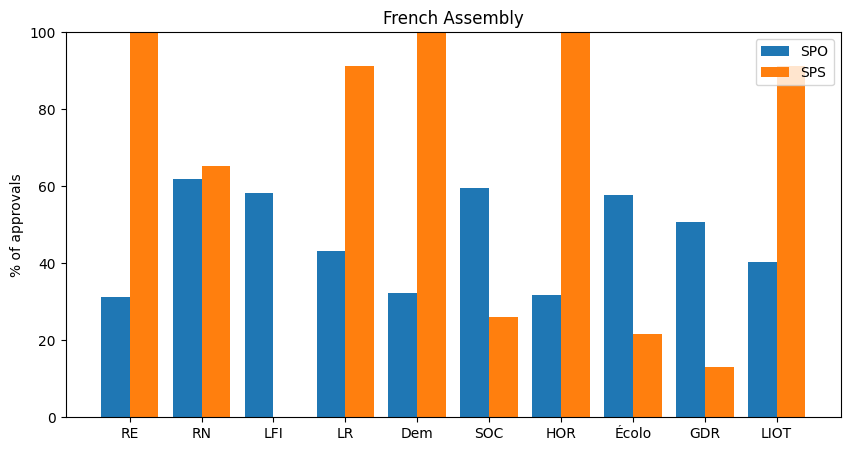

In [11]:
number_approvals_spo = 100*votes_spo.sum(0)/len(votes_spo)
number_approvals_sps = 100*votes_sps.sum(0)/len(votes_sps)

plt.figure(figsize=(10,5))
plt.bar([x-0.2 for x in range(10)], number_approvals_spo, label='SPO', width=0.4)
plt.bar([x+0.2 for x in range(10)], number_approvals_sps, label='SPS', width=0.4)
plt.legend()
plt.xticks(range(10), parties)
plt.ylim(0,100)
plt.ylabel('% of approvals')
plt.title('French Assembly')
plt.show()

Below, the actual distribution of votes in favor/abstaining/against for each parties for SPO and SPS

In [4]:

votes_spo_brut = df_spo.to_numpy()
votes_sps_brut = pd.read_csv('data/approval_assembly_sps.csv').to_numpy()
votes_cat_spo = np.zeros((10, 3))
votes_cat_sps = np.zeros((10, 3))
for i in range(3):
    for j in range(10):
        votes_cat_spo[j, i] = len([x for x in votes_spo_brut[:, j] if x == i-1])
        votes_cat_sps[j, i] = len([x for x in votes_sps_brut[:, j] if x == i-1])

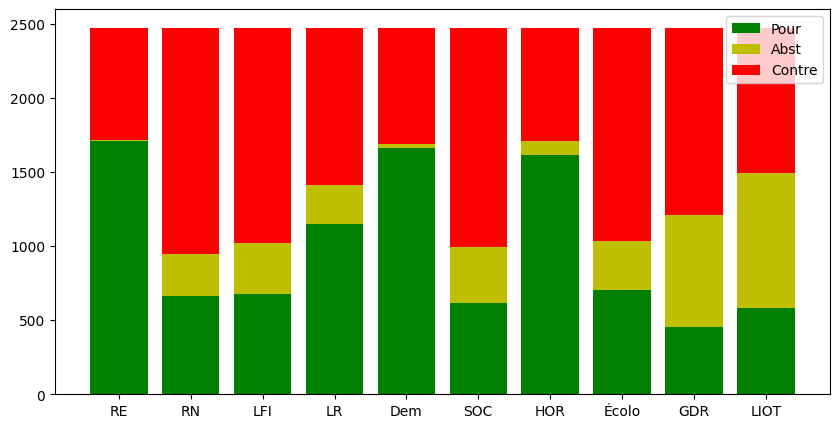

In [13]:
plt.figure(figsize=(10,5))
plt.bar(range(10), votes_cat_spo[:,0], label='Pour', color='g')
plt.bar(range(10), votes_cat_spo[:,1], bottom=votes_cat_spo[:,0], label='Abst', color='y')
plt.bar(range(10), votes_cat_spo[:,2], bottom=votes_cat_spo[:,0]+votes_cat_spo[:,1], label='Contre', color='r')
plt.xticks(range(10), parties)
plt.legend()
plt.show()


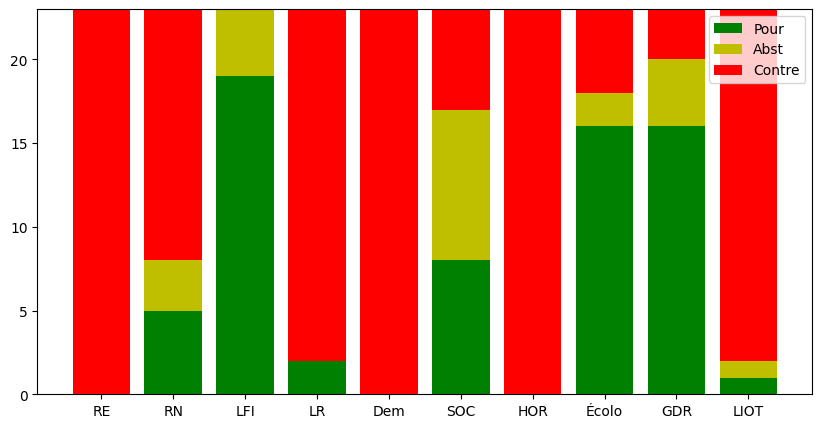

In [14]:
plt.figure(figsize=(10,5))
plt.bar(range(10), votes_cat_sps[:,0], label='Pour', color='g')
plt.bar(range(10), votes_cat_sps[:,1], bottom=votes_cat_sps[:,0], label='Abst', color='y')
plt.bar(range(10), votes_cat_sps[:,2], bottom=votes_cat_sps[:,0]+votes_cat_sps[:,1], label='Contre', color='r')
plt.xticks(range(10), parties)
plt.legend()
plt.show()

We can use our axis rules by specifying they should take into account abstention. For all rules we can find an easy variant, which consist for each vote to ignore all parties on the axis that are abstaining.

In [15]:
axis_rules = [axis.VoterDeletion, axis.BallotCompletion, axis.MinimalSwaps, axis.ForbiddenTriples]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(votes_spo_brut, abstention=True)
    res = rule_instance.bruteforce()
    axis.print_axis(res[0][0], parties)
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score)
    print("\n")

Voter Deletion
LFI < Écolo < GDR < SOC < LIOT < RN < LR < HOR < Dem < RE
Score of this axis : 481.0


Ballot Completion
LFI < Écolo < GDR < SOC < LIOT < RN < LR < HOR < Dem < RE
Score of this axis : 733.0


Minimal Swaps
LFI < Écolo < GDR < SOC < LIOT < RN < LR < HOR < Dem < RE
Score of this axis : 895.0


Forbidden Triples
LFI < Écolo < GDR < SOC < LIOT < RN < LR < HOR < Dem < RE
Score of this axis : 4114.0




This time, we obtain even better fitting results, but similar axis as before. For instance, for voter deletion, the best axis fits 80% of the voters. If we use circular axis (cycles), it is even better, and we can fit 89.4% voters on the best VD axis and the best BC axis needs  0.15 additional parties per votes for the profile to be linear. Note that we obtian similar axis than before, but for VD, LIOT is now closer to the government coalition. However, it is still between the left opposition and right opposition for BC.

In [5]:
axis_rules = [axis.VoterDeletionCircular, axis.BallotCompletionCircular]

for rule in axis_rules:
    print(rule.name)
    rule_instance = rule(votes_spo_brut, abstention=True)
    res = rule_instance.bruteforce()
    axis.print_axis(res[0][0], parties)
    axis_score = rule_instance.get_score(res[0][0])
    print("Score of this axis :", axis_score)
    print("\n") 

Voter Deletion Circular
GDR < RN < LR < HOR < RE < Dem < LIOT < SOC < Écolo < LFI
Score of this axis : 264.0


Ballot Completion Circular
GDR < LIOT < RN < LR < HOR < RE < Dem < SOC < Écolo < LFI
Score of this axis : 393.0


